In [1]:
from sympy import symbols, solveset, S, simplify, expand, nsolve, evalf, nonlinsolve, init_printing, Eq
from sympy.solvers import solve
import math
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import brentq

In [2]:
file1 = open('copy_numbers_time.dat','r')
iterations = -1
for line in file1:
    iterations +=1
file1.close



file = open('histogram_complexes_time.dat', 'r')
time = np.zeros(iterations)
A = np.zeros(iterations)
P = np.zeros(iterations)
T = np.zeros(iterations)
C = np.zeros(iterations)
AP = np.zeros(iterations)
APT = np.zeros(iterations)
APC = np.zeros(iterations)
APTC = np.zeros(iterations)

count = -1
for line in file:
    linesplit = line.split()

    if linesplit[0] == 'Time':
        count += 1
        time[count] = float(linesplit[2])

    if linesplit[1] == 'ap2:' and len(linesplit) == 3:
        A[count]= (int(linesplit[0]))

    if linesplit[1] == 'pip2:' and len(linesplit) == 3:
        P[count] = (int(linesplit[0]))

    if linesplit[1] == 'trans:' and len(linesplit) == 3:
        T[count] = (int(linesplit[0]))

    if linesplit[1] == 'cd4:' and len(linesplit) == 3:
        C[count] = (int(linesplit[0]))
        
    if 'pip2:' in linesplit and 'ap2:' in linesplit and 'trans:' not in linesplit and 'cd4:' not in linesplit:
        AP[count] = (int(linesplit[0]))
        
    if 'pip2:' in linesplit and 'ap2:' in linesplit and 'trans:' in linesplit and 'cd4:' not in linesplit:
        APT[count] = (int(linesplit[0]))

    if 'pip2:' in linesplit and 'ap2:' in linesplit and 'trans:' not in linesplit and 'cd4:' in linesplit:
        APC[count] = (int(linesplit[0]))

    if 'pip2:' in linesplit and 'ap2:' in linesplit and 'trans:' in linesplit and 'cd4:' in linesplit:
        APTC[count] = (int(linesplit[0]))

In [3]:
count

50000

In [10]:
APT[:10001].size

10001

In [70]:
x, y, z = symbols('x,y,z')

#z = x + y

eq1 = Eq(x - y + z + 2)
eq2 = Eq(x + y + 3 + (2*z))
eq3 = Eq(z/3 - y + x)

solve((eq1,eq2,eq3),(x,y))

In [78]:
x, y = symbols('x, y')

eq1 = x+y+2
eq2 = 2*x-y

solve(eq1,eq2,x)

/Users/jonathanfischer/opt/anaconda3/envs/nerdss/lib/python3.9/site-packages/IPython/lib/latextools.py:126: MatplotlibDeprecationWarning: 
The to_png function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use mathtext.math_to_image instead.
  mt.to_png(f, s, fontsize=12, dpi=dpi, color=color)
/Users/jonathanfischer/opt/anaconda3/envs/nerdss/lib/python3.9/site-packages/IPython/lib/latextools.py:126: MatplotlibDeprecationWarning: 
The to_rgba function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use mathtext.math_to_image instead.
  mt.to_png(f, s, fontsize=12, dpi=dpi, color=color)
/Users/jonathanfischer/opt/anaconda3/envs/nerdss/lib/python3.9/site-packages/IPython/lib/latextools.py:126: MatplotlibDeprecationWarning: 
The to_mask function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use mathtext.math_to_image instead.
  mt.to_png(f, s, fontsize=12, dpi=dpi, color=color)
/Users/jonathanfi

In [71]:
init_printing()
na, np, nt, nc, naptc, Kd1, Kd2, Kd3, Kd4, Kd5, Na, Np, Nt, Nc, L = symbols('n_a,n_p,n_t,n_c,n_aptc,K_d1,K_d2,K_d3,K_d4,K_d5,N_a,N_p,N_t,N_c,L')

list = [na, np, nt, nc, naptc, Kd1, Kd2, Kd3, Kd4, Kd5, Na, Np, Nt, Nc, L]

nap = Na - na - Nt + nt + naptc - Nc + nc

napt = Nt - nt - naptc

napc = Nc - nc - naptc  

V = L**3

S = L**2

#equations
eq1 = ((na*np)/((V)*nap)) - Kd1

eq2 = ((nap*nt)/((S)*napt)) - Kd2

eq3 = ((nap*nc)/((S)*napc)) - Kd3

eq4 = ((napt*nc)/((S)*naptc)) - Kd4

eq5 = ((napc*nt)/((S)*naptc)) - Kd5

eq6 = Np - Na + na - np 

list_eq = [eq1,eq2,eq3,eq4,eq5,eq6]

solve((eq1,eq2,eq3,eq4,eq5), na)

#nonlinsolve(list_eq, list)


In [10]:
def newsolver(ka1,kb1,ka2,kb2,ka3,kb3,ka4,kb4,Na,Np,Nt,Nc,L,iterations = iterations):
    #Define variables
    a,p,c,t,ap,apt,apc,aptc = symbols("a,p,c,t,ap,apt,apc,aptc")

    #Define rates
    k_on = np.array([ka1, ka2/2, ka3/2, ka4/2])
    k_off = np.array([kb1/1e6, kb2/1e6, kb3/1e6, kb4/1e6])

    #Define initial solution to start with
    init_conc = [Na,Np,Nt,Nc,0,0,0,0]
    init_sol = np.random.rand(len(init_conc))*max(init_conc)

    #Rate Equations
    eq1 = -k_on[0]*a*p + k_off[0]*ap*L**3
    eq2 = - k_on[1]*ap*t + k_off[1]*apt*L**2
    eq3 = -k_on[2]*ap*c + k_off[2]*apc*L**2 
    eq4 = -k_on[3]*apt*c + k_off[3]*aptc*L**2
    #eq5 = - k_on[4]*apc*t + k_off[4]*aptc*L**2

    c1 = a+ap+apc+apt+aptc-Na   #A
    c2 = p+ap+apc+apt+aptc-Np    #P
    c3 = c+apc+aptc-Nc           #T
    c4 = t+apt+aptc-Nt           #C

    system = [eq1,eq2,eq3,eq4,c1,c2,c3,c4]

    #print(init_sol)
    #print(system)

    solution = nsolve(system,[a,p,c,t,ap,apt,apc,aptc],init_sol,verify=True)

    #print("The equilibrium solution is: ")
    #print(solution)
    
    solutions = {}
    solutions['A'] = float(solution[0])*np.ones(iterations)
    solutions['P'] = float(solution[1])*np.ones(iterations)
    solutions['C'] = float(solution[2])*np.ones(iterations)
    solutions['T'] = float(solution[3])*np.ones(iterations)
    solutions['AP'] = float(solution[4])*np.ones(iterations)
    solutions['APT'] = float(solution[5])*np.ones(iterations)
    solutions['APC'] = float(solution[6])*np.ones(iterations)
    solutions['APTC'] = float(solution[7])*np.ones(iterations)

    return solutions


In [107]:
na,np,nc,nt,nap,napt,napc,naptc,Kd1,Kd2,Kd3,Kd4,Na,Np,Nt,Nc,L = symbols("n_a,n_p,n_c,n_t,n_ap,n_apt,n_apc,n_aptc,K_d1, K_d2, K_d3, K_d4, N_a, N_p, N_t, N_c, L")

#Rate Equations
V = L**3

S = L**2

#equations
eq1 = ((na*np)/((V)*nap)) - Kd1

eq2 = ((nap*nt)/((S)*napt)) - Kd2

eq3 = ((nap*nc)/((S)*napc)) - Kd3

eq4 = ((napt*nc)/((S)*naptc)) - Kd4
#eq5 = - k_on[4]*apc*t + k_off[4]*aptc*L**2

c1 = na+nap+napc+napt+naptc-Na   #A
c2 = np+nap+napc+napt+naptc-Np    #P
c3 = nc+napc+naptc-Nt           #T
c4 = nt+napt+naptc-Nc           #C

system = [eq1,eq2,eq3,eq4,c1,c2,c3,c4]

solve(system,na)

/Users/jonathanfischer/opt/anaconda3/envs/nerdss/lib/python3.9/site-packages/IPython/lib/latextools.py:126: MatplotlibDeprecationWarning: 
The to_png function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use mathtext.math_to_image instead.
  mt.to_png(f, s, fontsize=12, dpi=dpi, color=color)
/Users/jonathanfischer/opt/anaconda3/envs/nerdss/lib/python3.9/site-packages/IPython/lib/latextools.py:126: MatplotlibDeprecationWarning: 
The to_rgba function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use mathtext.math_to_image instead.
  mt.to_png(f, s, fontsize=12, dpi=dpi, color=color)
/Users/jonathanfischer/opt/anaconda3/envs/nerdss/lib/python3.9/site-packages/IPython/lib/latextools.py:126: MatplotlibDeprecationWarning: 
The to_mask function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use mathtext.math_to_image instead.
  mt.to_png(f, s, fontsize=12, dpi=dpi, color=color)
/Users/jonathanfi

In [5]:
x = newsolver(0.1,33,0.1362,48.17,0.01362,48.17,0.01362,48.17,500,1000,100,100,100)

In [99]:
x

{'A': array([119.00577708, 119.00577708, 119.00577708, ..., 119.00577708,
        119.00577708, 119.00577708]),
 'P': array([619.00577708, 619.00577708, 619.00577708, ..., 619.00577708,
        619.00577708, 619.00577708]),
 'C': array([19.07588713, 19.07588713, 19.07588713, ..., 19.07588713,
        19.07588713, 19.07588713]),
 'T': array([2.43489146, 2.43489146, 2.43489146, ..., 2.43489146, 2.43489146,
        2.43489146]),
 'AP': array([223.22807126, 223.22807126, 223.22807126, ..., 223.22807126,
        223.22807126, 223.22807126]),
 'APT': array([76.84203879, 76.84203879, 76.84203879, ..., 76.84203879,
        76.84203879, 76.84203879]),
 'APC': array([60.20104312, 60.20104312, 60.20104312, ..., 60.20104312,
        60.20104312, 60.20104312]),
 'APTC': array([20.72306975, 20.72306975, 20.72306975, ..., 20.72306975,
        20.72306975, 20.72306975])}

In [11]:
def solver(Na,Nb,Nc,L,ka1,kb1,ka2,kb2):   
    
    Kd1 = (kb1*(10**-6))/ka1
    Kd2 = (kb2*(10**-6))/(ka2/2)
    
    na_imp = symbols('na_imp', real = True, positive = True)

    nab_imp = (((Nb*na_imp)-(Na*na_imp)+(na_imp**2))/((L**3)*Kd1))

    eq1 = (((nab_imp*(Nc-Na+na_imp+nab_imp))/((L**2)*(Na-na_imp-nab_imp)))-Kd2)

    x = solveset(eq1, na_imp, domain = S.Reals)
    #na = nsolve(eq1, na_imp, -10, dict = True)
    
    
    na = 0 
    for i in list(x):
        if i > 0:
            na = i
    
    nab = (((Nb*na)-(Na*na)+(na**2))/((L**3)*Kd1))
    
    nc = na + nab + Nc - Na
    
    nb = Nb - Na + na
    
    nabc = Nc - nc
    
    na_array = na * np.ones(10001)
    nb_array = nb * np.ones(10001)
    nc_array = nc * np.ones(10001)
    nab_array = nab * np.ones(10001)
    nabc_array = nabc * np.ones(10001)


    print('Free AP2: ' + str(na))
    print('Free PIP2: ' + str(nb))
    print('Free Transferrin: ' + str(nc))
    print('AP2-PIP2: ' + str(nab))
    print('AP2-PIP2-Transferrin: ' + str(nabc))

    return na_array, nb_array, nc_array, nab_array, nabc_array
    

In [ ]:
nab_imp = (((Nb*na_imp)-(Na*na_imp)+(na_imp**2))/((L**3)*Kd1))

eq1 = (((nab_imp*(Nc-Na+na_imp+nab_imp))/((L**2)*(Na-na_imp-nab_imp)))-Kd2)

In [153]:
Na = 500
Nb = 1000
Nc = 100
L = 100
ka1 = 0.1
kb1 = 33
ka2 = 0.1362
kb2 = 48.17
Kd1 = (kb1*10**-6)/ka1
Kd2 = (kb2*10**-6)/(ka2/2)

print(Kd1)
print(Kd2)

0.00032999999999999994
0.0007073421439060207


In [251]:
na_imp, Na, Nb, Nc, L, Kd1, Kd2 = symbols('na_imp, Na, Nb, Nc, L, Kd1, Kd2')


#Kd1 = kb1/ka1
#Kd2 = kb2/(ka2/2)

nab_imp = (((Nb*na_imp)-(Na*na_imp)+(na_imp**2))/((L**3)*Kd1))

eq1 = (((nab_imp*(Nc-Na+na_imp+nab_imp))/((L**2)*(Na-na_imp-nab_imp)))-Kd2)


x = eq1.evalf() #subs = {Na:500, Nb:1000, Nc:100,L:100,Kd1:0.00033,Kd2:0.000707})


#x = simplify(eq1)
simplify(x)
#expand(x)

(-Kd1*Kd2*L**5*(Kd1*L**3*(Na - na_imp) + Na*na_imp - Nb*na_imp - na_imp**2) + na_imp*(-Na + Nb + na_imp)*(Kd1*L**3*(-Na + Nc + na_imp) - Na*na_imp + Nb*na_imp + na_imp**2))/(Kd1*L**5*(Kd1*L**3*(Na - na_imp) + Na*na_imp - Nb*na_imp - na_imp**2))

In [254]:
n_A, N_A, N_P, N_T, L, K_d1, K_d2 = symbols('n_A, N_A, N_P, N_T, L, K_d1, K_d2')


#Kd1 = kb1/ka1
#Kd2 = kb2/(ka2/2)

n_AP = (((N_P*n_A)-(N_A*n_A)+(n_A**2))/((L**3)*K_d1))

eq1 = (((n_AP*(N_T-N_A+n_A+n_AP))/((L**2)*(N_A-n_A-n_AP)))-K_d2)


x = eq1.evalf() #subs = {Na:500, Nb:1000, Nc:100,L:100,Kd1:0.00033,Kd2:0.000707})

x
#x = simplify(eq1)
#simplify(x)
#expand(x)

-K_d2 + (-N_A*n_A + N_P*n_A + n_A**2)*(-N_A + N_T + n_A + (-N_A*n_A + N_P*n_A + n_A**2)/(K_d1*L**3))/(K_d1*L**5*(N_A - n_A - (-N_A*n_A + N_P*n_A + n_A**2)/(K_d1*L**3)))

In [151]:
x, y = symbols('x, y')

y = 7
eq = x**2 + y 

eq.evalf(subs={y:5})

x**2 + 5.0

In [176]:
def graph(formula, x_range):  
    x = np.array(x_range)  
    y = formula(x)  # <- note now we're calling the function 'formula' with x
    plt.plot(x, y)  
    plt.show()

In [177]:
nab_imp = (((Nb*x)-(Na*x)+(x**2))/((L**3)*Kd1))

eq1 = (((nab_imp*(Nc-Na+x+nab_imp))/((L**2)*(Na-x-nab_imp)))-Kd2)

eq1

-Kd2 + (-Na*(3.03030303030303e-7*(na_imp**2 + 500.0*na_imp)*(0.00303030303030303*na_imp**2 + 2.51515151515152*na_imp - 400.0)/(-0.00303030303030303*na_imp**2 - 2.51515151515152*na_imp + 500.0) - 0.000707) + Nb*(3.03030303030303e-7*(na_imp**2 + 500.0*na_imp)*(0.00303030303030303*na_imp**2 + 2.51515151515152*na_imp - 400.0)/(-0.00303030303030303*na_imp**2 - 2.51515151515152*na_imp + 500.0) - 0.000707) + 4.99849e-7*(0.000428614290000429*(na_imp**2 + 500.0*na_imp)*(0.00303030303030303*na_imp**2 + 2.51515151515152*na_imp - 400.0)/(-0.00303030303030303*na_imp**2 - 2.51515151515152*na_imp + 500.0) - 1)**2)*(-Na + Nc + 3.03030303030303e-7*(na_imp**2 + 500.0*na_imp)*(0.00303030303030303*na_imp**2 + 2.51515151515152*na_imp - 400.0)/(-0.00303030303030303*na_imp**2 - 2.51515151515152*na_imp + 500.0) - 0.000707 + (-Na*(3.03030303030303e-7*(na_imp**2 + 500.0*na_imp)*(0.00303030303030303*na_imp**2 + 2.51515151515152*na_imp - 400.0)/(-0.00303030303030303*na_imp**2 - 2.51515151515152*na_imp + 500.0) - 

In [175]:
def f(x):
    Na = 500
    Nb = 1000
    Nc = 100
    L = 100
    ka1 = 0.1
    kb1 = 33
    ka2 = 0.1362
    kb2 = 48.17

    Kd1 = (kb1*10**-6)/ka1
    Kd2 = (kb2*10**-6)/(ka2/2)
    
    nab_imp = (((Nb*x)-(Na*x)+(x**2))/((L**3)*Kd1))

    eq1 = (((nab_imp*(Nc-Na+x+nab_imp))/((L**2)*(Na-x-nab_imp)))-Kd2)
    return (eq1)

brentq(f, -1, 100)

ValueError: f(a) and f(b) must have different signs

In [ ]:
#Kd increased by several orders of magnitute make for more interesting results 
x = solver(50,500,50,50,0.0033,0.000707)
x

Free AP2: 5.41924493180763
Free PIP2: 455.419244931808
Free Transferrin: 11.4023441680364
AP2-PIP2: 5.98309923622874
AP2-PIP2-Transferrin: 38.5976558319636


In [12]:
A_calc, P_calc, T_calc, AP_calc, APT_calc = solver(500,1000,100,100, 0.1, 33, .1362, 48.17)


Free AP2: 137.342409734781
Free PIP2: 637.342409734781
Free Transferrin: 2.59738664128759
AP2-PIP2: 265.254976906506
AP2-PIP2-Transferrin: 97.4026133587124


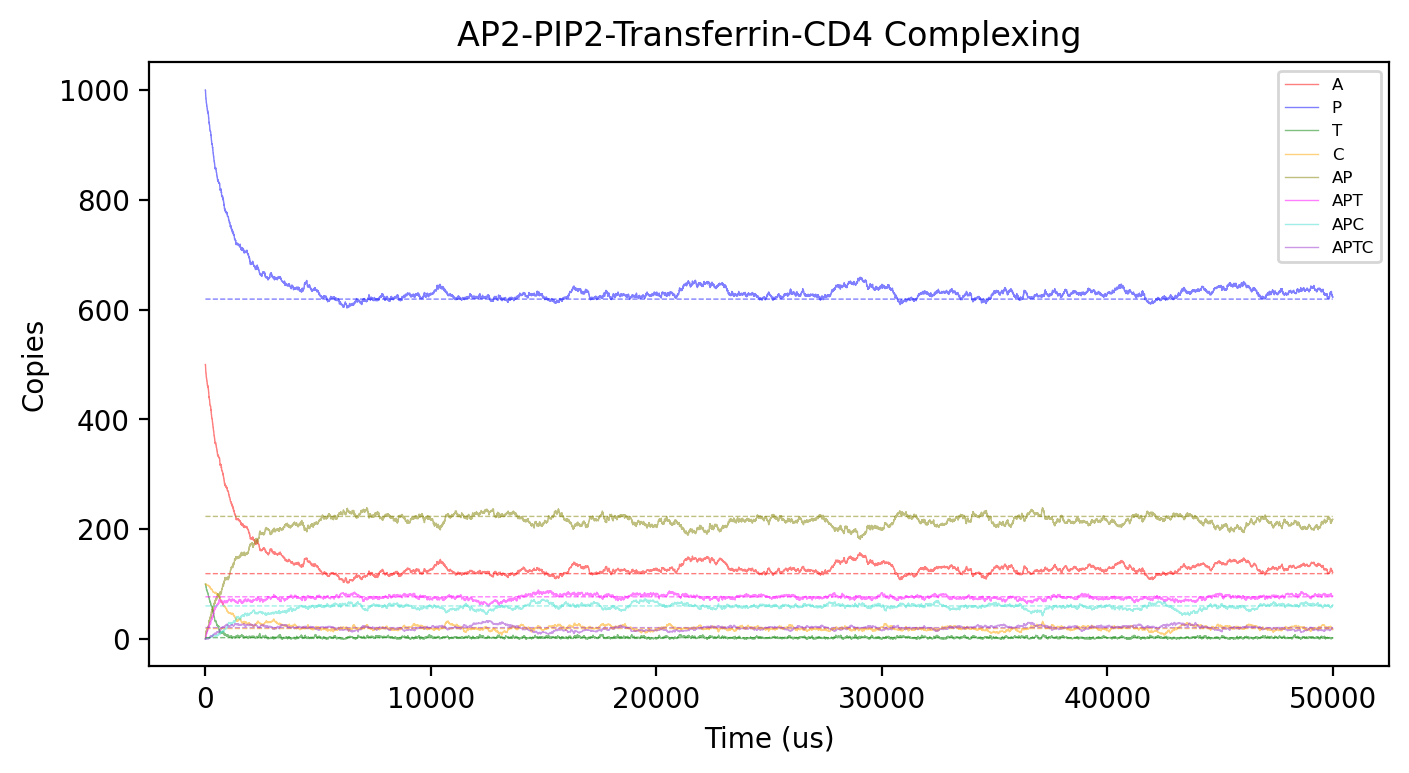

In [9]:
fig = plt.figure(figsize=(8,4),dpi=200)
ax = fig.add_subplot(111)
#ax.scatter(np.arange(step_n+1), path, c='blue',alpha=0.25,s=0.05);
ax.plot(A[:iterations],c='red',alpha=0.5,lw=0.5,ls='-', label = 'A');
ax.plot(P[:iterations],c='blue',alpha=0.5,lw=0.5,ls='-', label = 'P');
ax.plot(T[:iterations],c='green',alpha=0.5,lw=0.5,ls='-', label = 'T');
ax.plot(C[:iterations],c='orange',alpha=0.5,lw=0.5,ls='-', label = 'C');
ax.plot(AP[:iterations],c='olive',alpha=0.5,lw=0.5,ls='-', label = 'AP');
ax.plot(APT[:iterations],c='magenta',alpha=0.5,lw=0.5,ls='-', label = 'APT');
ax.plot(APC[:iterations],c='turquoise',alpha=0.5,lw=0.5,ls='-', label = 'APC');
ax.plot(APTC[:iterations],c='darkorchid',alpha=0.5,lw=0.5,ls='-', label = 'APTC');



ax.plot(x['A'],c='red',alpha=0.5,lw=0.5,ls='--');
ax.plot(x['P'],c='blue',alpha=0.5,lw=0.5,ls='--');
ax.plot(x['T'],c='green',alpha=0.5,lw=0.5,ls='--');
ax.plot(x['C'],c='orange',alpha=0.5,lw=0.5,ls='--');
ax.plot(x['AP'],c='olive',alpha=0.5,lw=0.5,ls='--');
ax.plot(x['APT'],c='magenta',alpha=0.5,lw=0.5,ls='--');
ax.plot(x['APC'],c='turquoise',alpha=0.5,lw=0.5,ls='--');
ax.plot(x['APTC'],c='darkorchid',alpha=0.5,lw=0.5,ls='--');

plt.title('AP2-PIP2-Transferrin-CD4 Complexing')
plt.xlabel('Time (us)')
plt.ylabel('Copies')
#plt.tight_layout(pad=0)
plt.legend(loc = 'upper right', prop={'size': 6})
plt.savefig('./CD4_copynumbers.png',dpi=250);